In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
pd.set_option('display.max_columns', None)

In [38]:
#Read the CSV data file into Panda dataframe
df = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv",sep="\t")
df.head().to_csv("output/head.csv", index=False, header=True)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
print(df.isnull().values.sum())
print(df.isnull().sum())

0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSin

In [6]:
#Create a dataframe with only numeric variables
df_num = df[['Age','DailyRate','DistanceFromHome', 'Education','EmployeeNumber', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 
                        'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 
                       'RelationshipSatisfaction', 'StockOptionLevel',
                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                       'YearsWithCurrManager']].copy()

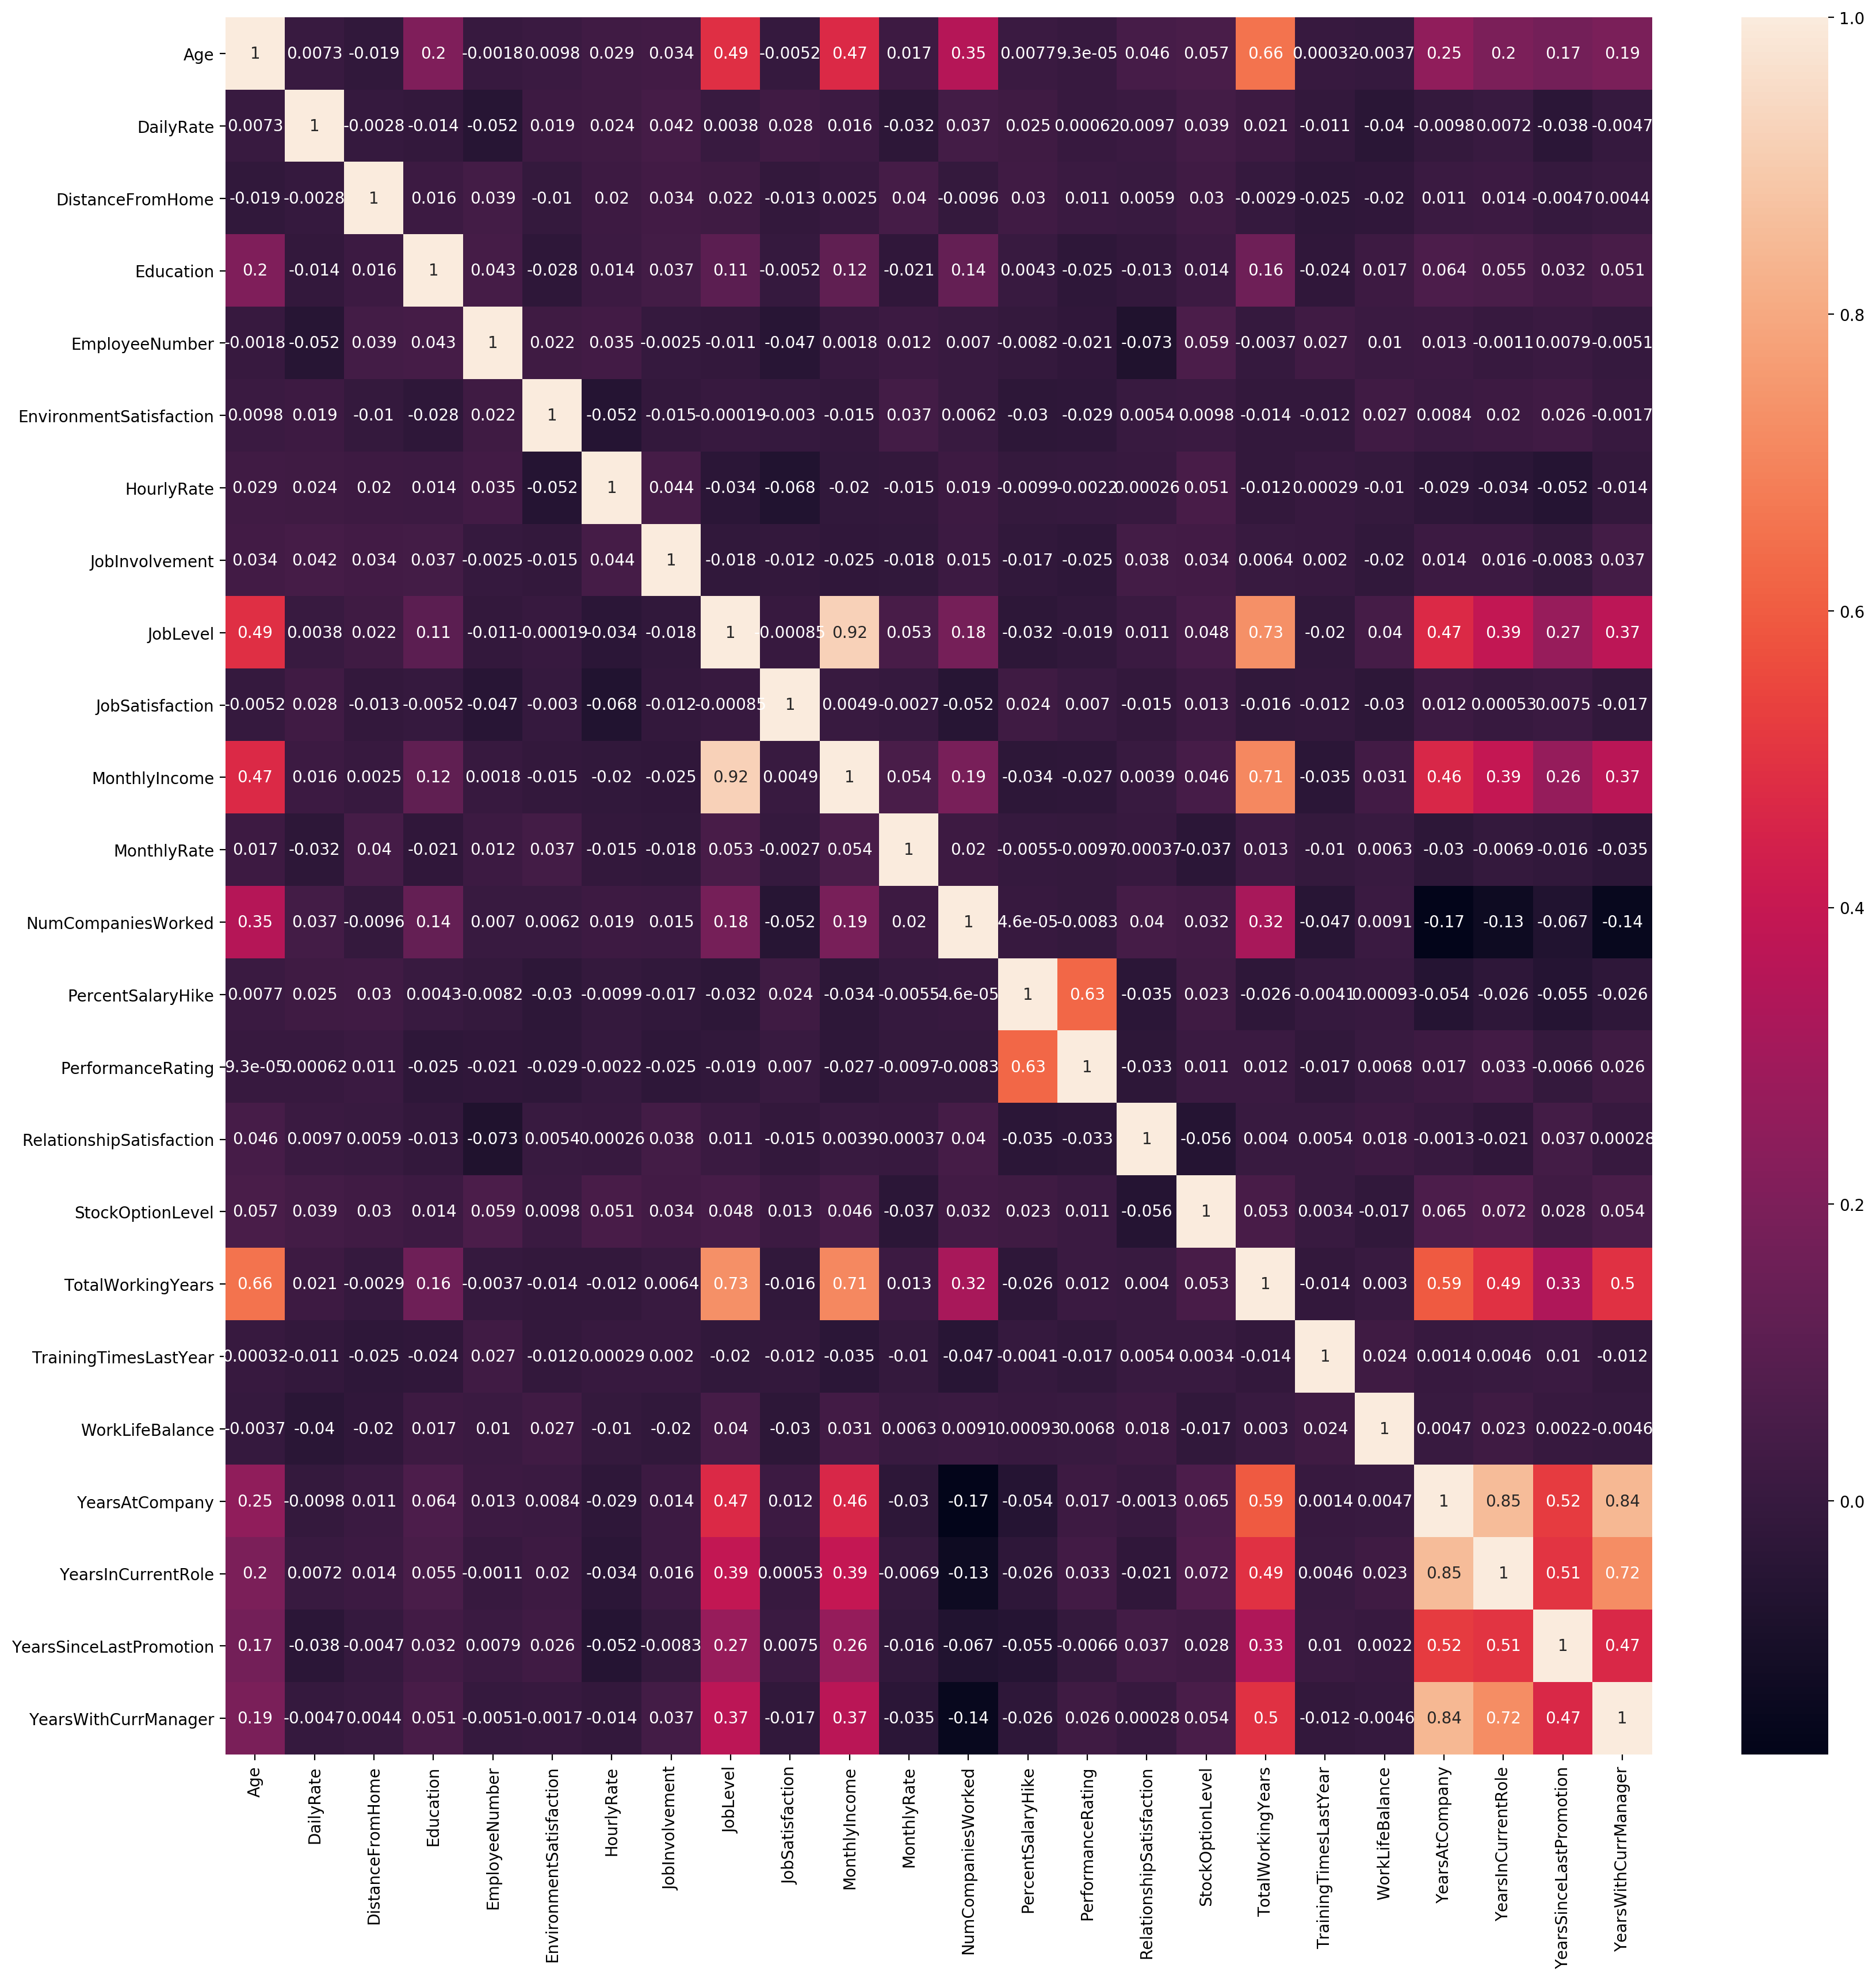

In [37]:
# Create correlation matrix using Spearman method (ordinal variables) and heatmap
hr_corr_matrix = df_num.corr(method='spearman')
plt.figure(figsize= (20,20), dpi=200)
_ = sns.heatmap(hr_corr_matrix,annot=True)
plt.savefig("heatmap.png")

In [8]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'], prefix = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'])
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 56 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null object
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    

In [9]:
df_onehot.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [10]:
# Assign X (data) and y (target)
#X = df_onehot.drop(["Attrition","YearsWithCurrManager","YearsInCurrentRole","MonthlyIncome",
#                    "TotalWorkingYears","Over18_Y","EmployeeCount","EmployeeNumber",
#                   "HourlyRate","MonthlyRate","DailyRate"], axis=1)
extract_columns = ['OverTime_Yes','MaritalStatus_Single','MaritalStatus_Divorced',
                       'BusinessTravel_Travel_Frequently',
                       'JobRole_Laboratory Technician','JobRole_Sales Representative',
                       'EducationField_Technical Degree','EducationField_Human Resources',
                       'PerformanceRating', 
                       'RelationshipSatisfaction','StockOptionLevel',
                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsSinceLastPromotion','JobInvolvement', 'JobLevel','JobSatisfaction']
X = df_onehot[extract_columns]
y = df_onehot["Attrition"]
print(X.shape, y.shape)

(1470, 18) (1470,)


In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size = 0.25)
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1, stratify=y, test_size = 0.25)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
result = classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8729582577132486
Testing Data Score: 0.8804347826086957


In [16]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No']
First 10 Actual labels: ['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No']


In [17]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
5,No,No
6,Yes,Yes
7,No,No
8,No,No
9,No,No


In [18]:
#max_name_length = max([len(col) for col in X_train.columns])
variable_name = []
coefficient = []

for i in np.arange(X.shape[1]):
    variable_name.append(X.columns[i])
    coefficient.append(classifier.coef_[0][i])
    
log_regression_summary_df = pd.DataFrame({"Variable":variable_name,"Coefficient":coefficient})
log_regression_sorted_summmary_df = log_regression_summary_df.sort_values('Coefficient', ascending=False)

In [19]:
log_regression_sorted_summmary_df.reset_index(drop=True,inplace=True)
log_regression_sorted_summmary_df

,Variable,Coefficient
0,OverTime_Yes,1.371778
1,EducationField_Human Resources,1.312591
2,JobRole_Sales Representative,1.007916
3,MaritalStatus_Single,0.839108
4,JobRole_Laboratory Technician,0.739867
5,EducationField_Technical Degree,0.737939
6,BusinessTravel_Travel_Frequently,0.718933
7,YearsSinceLastPromotion,0.038198
8,PerformanceRating,0.019416
9,TotalWorkingYears,-0.046025


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8668478260869565

In [21]:
variable_name_rf = []
features_rf = []

for i in np.arange(X.shape[1]):
    variable_name_rf.append(X.columns[i])
    features_rf.append(rf.feature_importances_[i])
    
rf_summary_df = pd.DataFrame({"Variable":variable_name_rf,"Feature_Importance":features_rf})
#rf_sorted_summmary_df = summary_df.sort_values("Feature_Importance", ascending=False)
rf_sorted_summary_df = rf_summary_df.sort_values("Feature_Importance",ascending=False)
rf_sorted_summary_df.reset_index(drop=True,inplace=True)
rf_sorted_summary_df

,Variable,Feature_Importance
0,TotalWorkingYears,0.157671
1,TrainingTimesLastYear,0.084786
2,YearsSinceLastPromotion,0.082213
3,JobSatisfaction,0.081323
4,RelationshipSatisfaction,0.077735
5,JobInvolvement,0.072227
6,WorkLifeBalance,0.065699
7,StockOptionLevel,0.064426
8,OverTime_Yes,0.060988
9,JobLevel,0.059361


In [22]:
import tabpy_client

In [23]:
def PredictAttrition1(OverTime_Yes,MaritalStatus_Single,MaritalStatus_Divorced,
                       BusinessTravel_Travel_Frequently,
                       JobRole_Laboratory_Technician,JobRole_Sales_Representative,
                       EducationField_Technical_Degree,EducationField_Human_Resources,
                       PerformanceRating, 
                       RelationsSatsifaction,StockOptionLevel,
                       TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,
                       YearsSinceLastPromotion,JobInvolvement, JobLevel,JobSatisfaction):
    X_stack = np.column_stack([OverTime_Yes,MaritalStatus_Single,MaritalStatus_Divorced,
                       BusinessTravel_Travel_Frequently,
                       JobRole_Laboratory_Technician,JobRole_Sales_Representative,
                       EducationField_Technical_Degree,EducationField_Human_Resources,
                       PerformanceRating, 
                       RelationsSatsifaction,StockOptionLevel,
                       TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,
                       YearsSinceLastPromotion,JobInvolvement, JobLevel,JobSatisfaction])
    #X = [overtime_yes, marital_status,technician,travel]
    return classifier.predict(X_stack).tolist()


In [31]:
PredictAttrition1(1,0,0,0,0,0,1,1,2,2,3,5,6,3,5,3,3,3)

['No']

In [26]:
connection = tabpy_client.Client('http://localhost:9004/')
connection.deploy('PredictAttrition1',
                  PredictAttrition1,
                  'Returns attrition suggestion based on an logistic regression model trained using IBM HR dataset',
                 override=True)

In [34]:
log_regression_sorted_summmary_df.to_csv("output/coef.csv", index=False, header=True)

